# FIT1043 ASSIGNMENT 1 
## Jonathan Wong Leong Shan
## 31435297
## Dr Ian Tan

# ‎

# 1. Importing the necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# 2. Read the files

In [2]:
gdp19 = pd.read_csv('data/2019-GDP.csv') 
pop20 = pd.read_csv('data/2020-Population.csv')
vac = pd.read_csv('data/Vaccinations.csv')

# 3. Wrangle the data 

### WHY TUPLE OVER LIST ?
#### Using a tuple is more appropriate to store the names of all countries located in the South East Asia region. The reason is that there is a fixed number of countries in the SEA region and they will not change their names, at least anytime soon. Since there won't be anymore countries in the SEA region to be added or taken out and that tuples does not allow any mutations of the data stored in it,  this allows the integrity and consistency of the data throughout the entire code.

In [3]:
# List down all SEA countries in a tuple
sea_countries = ('Indonesia', 'Vietnam', 'Thailand', 'Singapore', 'Philippines', 'Malaysia', 'Lao PDR', 'Myanmar', 
                 'Cambodia', 'Brunei Darussalam', 'Timor-Leste')

## a) Wrangling data from 2019-GDP.csv

In [4]:
gdp19.head(20)      # Print first 20 rows of data

,Unnamed: 0,Gross domestic product 2019,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,(millions of,NaN
2,NaN,Ranking,NaN,Economy,US dollars),NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,1,NaN,United States,"21,427,700",NaN
5,CHN,2,NaN,China,"14,342,903",NaN
6,JPN,3,NaN,Japan,"5,081,770",NaN
7,DEU,4,NaN,Germany,"3,845,630",NaN
8,IND,5,NaN,India,"2,875,142",NaN
9,GBR,6,NaN,United Kingdom,"2,827,113",NaN


In [5]:
gdp19.columns = ['delete', 'delete', 'delete', 'country', 'GDP', 'delete']      # Rename columns to be deleted to 'delete' and 
                                                                                # those wrongly named accordingly

# Delete columns which are not related to what we want
gdp19.drop(
        columns= 'delete',
        inplace=True
    )

# Only retrieve data for SEA countries 
for i in gdp19.index:
    if gdp19.loc[i,:].country not in sea_countries :      # Check if each row is not in the tuple "sea_countries". 
        gdp19.drop(index=i,inplace=True)                  # If row's country is not in sea_countries, delete the row

# Reset index 
gdp19.reset_index(drop=True, inplace=True)

# Print first 20 rows of data to see result
gdp19.head(20)

,country,GDP
0,Indonesia,"1,119,191"
1,Thailand,"543,650"
2,Philippines,"376,796"
3,Singapore,"372,063"
4,Malaysia,"364,702"
5,Vietnam,"261,921"
6,Myanmar,"76,086"
7,Cambodia,"27,089"
8,Lao PDR,"18,174"
9,Brunei Darussalam,"13,469"


## b) Wrangling data from 2020-Population.csv

In [6]:
pop20.head(25) # Print first 20 rows of data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Department of Economic and Social Affairs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,World Population Prospects 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,File POP/1-1: Total population (both sexes com...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Estimates, 1950 - 2020",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Set row at index 15 to become the column header
pop20.columns = pop20.iloc[15]

# Rename two column header to more appropriate names
pop20.rename(
    columns = {'Region, subregion, country or area *':'country',
               '2019':'population'}, 
    inplace = True
)

# Rename wrongly spelled countries found in the data
for i in pop20.index:
    if pop20.loc[i,:].country == 'Viet Nam' :
        pop20.loc[i,:].country = 'Vietnam'
    elif pop20.loc[i,:].country == "Lao People's Democratic Republic" :
        pop20.loc[i,:].country = 'Lao PDR'

# Only retrieve data for SEA countries 
for i in pop20.index:
    if pop20.loc[i,:].country not in sea_countries :      # Check if each row is not in the tuple "sea_countries". 
        pop20.drop(index=i,inplace=True)                  # If row's country is not in sea_countries, delete the row

# Reset index  
pop20.reset_index(drop=True,inplace=True)                 

# Only keep columns titled 'country' and 'population'
pop20 = pop20[['country','population']]

# Remove index column name from '15' to None
pop20.columns.name=None

# Print first 20 rows of data
pop20.head(20)


,country,population
0,Brunei Darussalam,433
1,Cambodia,16 487
2,Indonesia,270 626
3,Lao PDR,7 169
4,Malaysia,31 950
5,Myanmar,54 045
6,Philippines,108 117
7,Singapore,5 804
8,Thailand,69 626
9,Timor-Leste,1 293


## c) Wrangling data from Vaccinations.csv

In [8]:
vac.head(20)  # Print first 20 rows of data

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
5,Albania,ALB,2021-01-15,308.0,308.0,NaN,42.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
6,Albania,ALB,2021-01-16,369.0,369.0,NaN,61.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
7,Albania,ALB,2021-01-17,405.0,405.0,NaN,36.0,58.0,0.01,0.01,NaN,20.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
8,Albania,ALB,2021-01-18,447.0,447.0,NaN,42.0,55.0,0.02,0.02,NaN,19.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
9,Albania,ALB,2021-01-19,483.0,483.0,NaN,36.0,51.0,0.02,0.02,NaN,18.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [9]:
# Only retrieve data for SEA countries 
for i in vac.index:
    if vac.loc[i,:].country not in sea_countries :          # Check if each row is not in the tuple "sea_countries". 
        vac.drop(index=i,inplace=True)                      # If row's country is not in sea_countries, delete the row

# Only keep columns titled 'country', 'daily_vaccinations', 'people_fully_vaccinated', 'vaccines'
vac = vac[['country','daily_vaccinations','people_fully_vaccinated','vaccines']]

# Group the dataframe by country and displaying the total people_fully_vaccinated, total daily_vaccinations 
# and the unique vaccine names
filter = {'people_fully_vaccinated':'sum','daily_vaccinations':'sum','vaccines':pd.unique}
vac = vac.groupby(['country']).agg(filter)

vac.rename(                                                   # Rename daily_vaccinations column to total_vaccinations
    columns={'daily_vaccinations':'total_vaccinations'},
    inplace=True
)


## Displaying all three final dataframes

In [10]:
vac  # Print whole dataframe of altered 'Vaccinations'

,people_fully_vaccinated,total_vaccinations,vaccines
country,,,
Cambodia,0.0,8171.0,Sinopharm/Beijing
Indonesia,7160580.0,2022788.0,Sinovac
Myanmar,0.0,82823.0,Oxford/AstraZeneca
Singapore,122100.0,329630.0,Pfizer/BioNTech


In [11]:
gdp19  # Print whole dataframe of altered '2019-GDP'

,country,GDP
0,Indonesia,"1,119,191"
1,Thailand,"543,650"
2,Philippines,"376,796"
3,Singapore,"372,063"
4,Malaysia,"364,702"
5,Vietnam,"261,921"
6,Myanmar,"76,086"
7,Cambodia,"27,089"
8,Lao PDR,"18,174"
9,Brunei Darussalam,"13,469"


In [12]:
pop20  # Print whole dataframe of altered '2020-Population'

,country,population
0,Brunei Darussalam,433
1,Cambodia,16 487
2,Indonesia,270 626
3,Lao PDR,7 169
4,Malaysia,31 950
5,Myanmar,54 045
6,Philippines,108 117
7,Singapore,5 804
8,Thailand,69 626
9,Timor-Leste,1 293






# 4. Merging all three final dataframes accordingly

In [13]:
# merging 2020-Population and 2019-GDP based on the 'country' column
merged = pd.merge(pop20, gdp19,on='country')

# merging previous merged dataframe with Vaccinations based on 'country' column
merged = pd.merge(merged, vac, on='country', how='left')

# Display merged dataframe
merged

,country,population,GDP,people_fully_vaccinated,total_vaccinations,vaccines
0,Brunei Darussalam,433,"13,469",NaN,NaN,NaN
1,Cambodia,16 487,"27,089",0.0,8171.0,Sinopharm/Beijing
2,Indonesia,270 626,"1,119,191",7160580.0,2022788.0,Sinovac
3,Lao PDR,7 169,"18,174",NaN,NaN,NaN
4,Malaysia,31 950,"364,702",NaN,NaN,NaN
5,Myanmar,54 045,"76,086",0.0,82823.0,Oxford/AstraZeneca
6,Philippines,108 117,"376,796",NaN,NaN,NaN
7,Singapore,5 804,"372,063",122100.0,329630.0,Pfizer/BioNTech
8,Thailand,69 626,"543,650",NaN,NaN,NaN
9,Timor-Leste,1 293,"1,674",NaN,NaN,NaN






# 5. Managing any data type issues or data issues

In [14]:
# Remove any punctuations from the data that are supposed to be numerical values 
merged['GDP'] = merged['GDP'].str.replace(',','')
merged['population'] = merged['population'].str.replace(' ','')

# Converting columns 'people_fully_vaccinated' and 'daily_vaccinations' to numerical type
merged['GDP'] = pd.to_numeric(merged['GDP'])
merged['population'] = pd.to_numeric(merged['population'])

# Display merged dataframe
merged

,country,population,GDP,people_fully_vaccinated,total_vaccinations,vaccines
0,Brunei Darussalam,433,13469,NaN,NaN,NaN
1,Cambodia,16487,27089,0.0,8171.0,Sinopharm/Beijing
2,Indonesia,270626,1119191,7160580.0,2022788.0,Sinovac
3,Lao PDR,7169,18174,NaN,NaN,NaN
4,Malaysia,31950,364702,NaN,NaN,NaN
5,Myanmar,54045,76086,0.0,82823.0,Oxford/AstraZeneca
6,Philippines,108117,376796,NaN,NaN,NaN
7,Singapore,5804,372063,122100.0,329630.0,Pfizer/BioNTech
8,Thailand,69626,543650,NaN,NaN,NaN
9,Timor-Leste,1293,1674,NaN,NaN,NaN


# 6. Feature engineering (create) the column “perCapitaGDP”

In [15]:
# Creating a new column which contains the per capita GDP for each country
merged['perCapitaGDP (thousands of US dollars)'] = merged['GDP'] / merged['population'] 


In [16]:
# Renaming the appropriate columns 
merged.rename(
        columns={
            'population': 'population (thousands)',
            'GDP':'GDP (millions)'
        },
        inplace=True
)

merged  # Print the final merged dataframe

,country,population (thousands),GDP (millions),people_fully_vaccinated,total_vaccinations,vaccines,perCapitaGDP (thousands of US dollars)
0,Brunei Darussalam,433,13469,NaN,NaN,NaN,31.106236
1,Cambodia,16487,27089,0.0,8171.0,Sinopharm/Beijing,1.643052
2,Indonesia,270626,1119191,7160580.0,2022788.0,Sinovac,4.135563
3,Lao PDR,7169,18174,NaN,NaN,NaN,2.535082
4,Malaysia,31950,364702,NaN,NaN,NaN,11.414773
5,Myanmar,54045,76086,0.0,82823.0,Oxford/AstraZeneca,1.407827
6,Philippines,108117,376796,NaN,NaN,NaN,3.485076
7,Singapore,5804,372063,122100.0,329630.0,Pfizer/BioNTech,64.104583
8,Thailand,69626,543650,NaN,NaN,NaN,7.808146
9,Timor-Leste,1293,1674,NaN,NaN,NaN,1.294664


# 7. Providing some statistical description of the final data that you have.

### From the table we can see that Indonesia has the largest population at 270,626,000 people whereas Brunei Darussalam has the lowest at 43,300 people. 

### Illustrated below is the bar graph of population of each country in ascending order. The lowest and highest population are coloured in red, while the others green to increase visibility. A bar chart was chosen because it accurately showed the difference in population between different countries at a certain pint of time, that is the year 2020. 

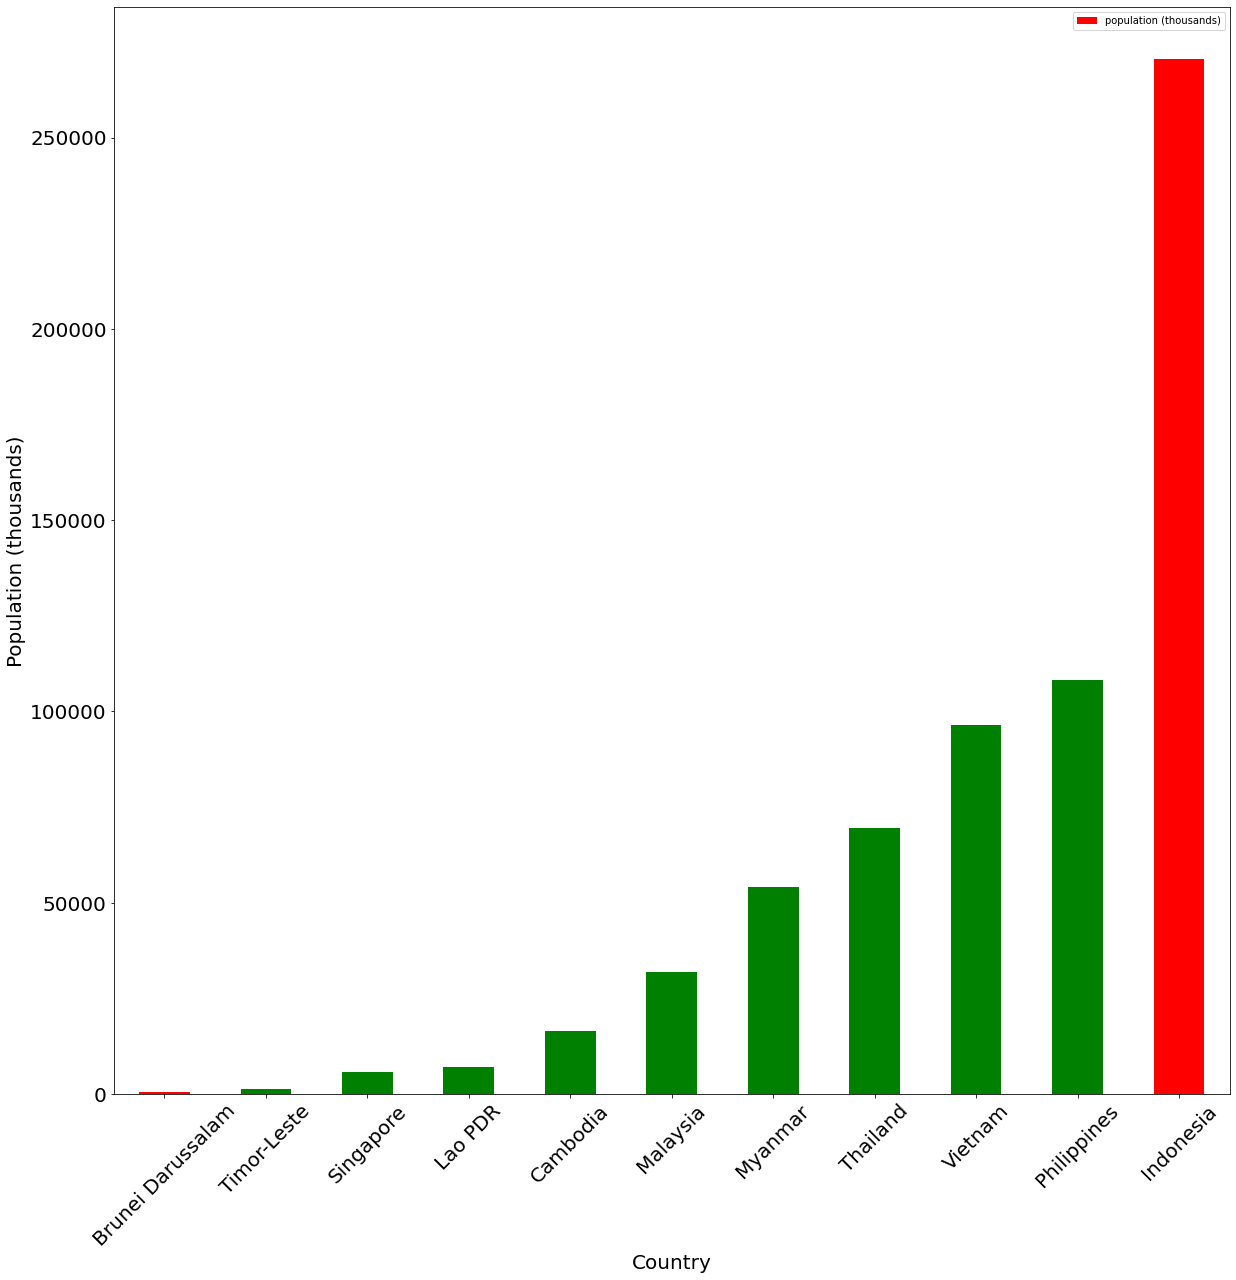

In [17]:
merged2 = merged.sort_values('population (thousands)') # Sorts dataframe from lowest population to the highest population 
barplotPop = merged2.plot.bar(x='country',y='population (thousands)', figsize=(20,20), fontsize=20, 
                              color=['r', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'r'])           # Plot of dataframe in bar chart
barplotPop.set_xticklabels(merged2['country'],rotation=45) # label every tick on x-axis with the names of the respective countries and rotated 45°

plt.xlabel('Country', fontsize=20)                # Label x-axis with 'Country'
plt.ylabel('Population (thousands)', fontsize=20) # Label y-axis with 'Population (thousands)'
plt.show()                                        # Display bar chart

### The country with the highest per capita GDP is Singapore as shown in the grey coloured wedge below. The value is almost half of the per capita GDP of all countries combined. 
### Meanwhile, Myanmar, Cambodia and Timor-Leste having the lowest per capita GDP
### A pie chart is an attractive chart to use especially in illustrating the difference in the GDP per capita for every country.

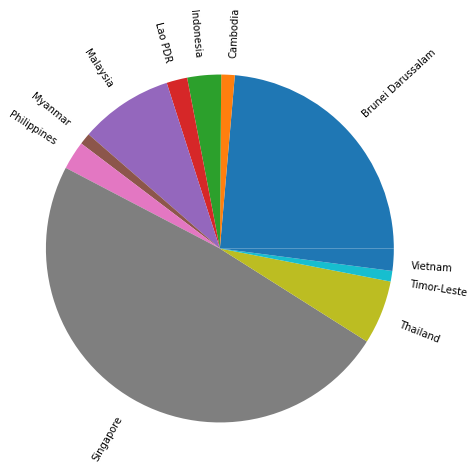

In [18]:
plt.pie(data=merged, x='perCapitaGDP (thousands of US dollars)',   # Plot pie chart of country vs perCapitaGDP
        labels='country', radius = 2, rotatelabels=True)           
plt.show()                                                         # Display pie chart

# 8. QUESTIONS

### 1. Each country currently may have only 1 vaccine being used but some will be more than 1 vaccine type. If there are more than 1 vaccine type, assume that it will be equally distributed to the country’s population. With this in mind, how would you visualise the estimated number of people vaccinated for each vaccine type for the South East Asian population? Provide some form of insights (although it may be straight forward and easily understood from the visualisation).

In [19]:
merged # Display 'merged' dataframe

,country,population (thousands),GDP (millions),people_fully_vaccinated,total_vaccinations,vaccines,perCapitaGDP (thousands of US dollars)
0,Brunei Darussalam,433,13469,NaN,NaN,NaN,31.106236
1,Cambodia,16487,27089,0.0,8171.0,Sinopharm/Beijing,1.643052
2,Indonesia,270626,1119191,7160580.0,2022788.0,Sinovac,4.135563
3,Lao PDR,7169,18174,NaN,NaN,NaN,2.535082
4,Malaysia,31950,364702,NaN,NaN,NaN,11.414773
5,Myanmar,54045,76086,0.0,82823.0,Oxford/AstraZeneca,1.407827
6,Philippines,108117,376796,NaN,NaN,NaN,3.485076
7,Singapore,5804,372063,122100.0,329630.0,Pfizer/BioNTech,64.104583
8,Thailand,69626,543650,NaN,NaN,NaN,7.808146
9,Timor-Leste,1293,1674,NaN,NaN,NaN,1.294664


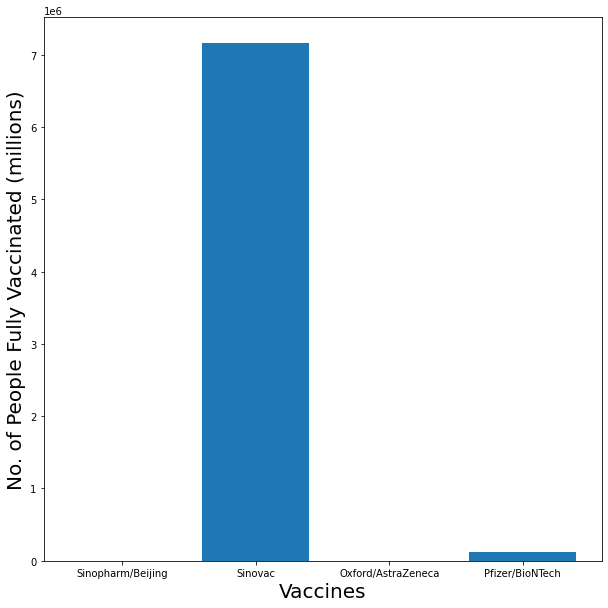

In [20]:
vacDist = merged.loc[merged.vaccines.notna()]                         # Retrieve rows of countries that have vaccines  
plt.figure(figsize=(10,10))                                           # Configure bar chart size
plt.bar('vaccines', 'people_fully_vaccinated', data=vacDist)          # Construct a bar chart of people_fully_vaccinated against vaccines
plt.xlabel('Vaccines',fontsize=20)                                    # Label x-axis as 'Vaccines'
plt.ylabel('No. of People Fully Vaccinated (millions)',fontsize=20)   # Label y-axis as 'No. of People Fully Vaccinated (millions)'
plt.show()                                                            # Display bar chart

### Since every SEA country receives only one brand or type of vaccines each, therefore it is logical to assume that only one type of vaccine will be distributed to each respective country.

### Therefore, based on the table, we can take the example of the Sinovac vaccine being the only vaccine  distributed to the country of Indonesia as well as the Pfizer/BioNTech vaccine to Singapore. 

### 2. For each of the country, plot a bar graph, with side-by-side bars for population, total vaccinations, and people_fully_vaccinated. There are two challenges here,firstly, the default graph will be difficult to visualise due to large differences in the numbers, and secondly, this information may not give a good visualsation. These 2 challenges are for you to figure out, make the appropriate code changes for the visualisation, and be able to explain why is the data used for the graph may be (some general knowledge / domain needed).

In [21]:
merged['people_fully_vaccinated'] = merged['people_fully_vaccinated'].div(1000)   # Divide whole column of 'people_fully_vaccinated' by 1000
merged['total_vaccinations'] = merged['total_vaccinations'].div(1000)             # Divide whole column of 'daily_vaccinations' by 1000
merged.rename(                                                                    # Adding '(thousands)' to the columns' name divided by 1000 
        columns={'people_fully_vaccinated':'people_fully_vaccinated (thousands)',
                'total_vaccinations':'total_vaccinations (thousands)'},
    inplace=True
)
merged                                                                            # Display dataframe

,country,population (thousands),GDP (millions),people_fully_vaccinated (thousands),total_vaccinations (thousands),vaccines,perCapitaGDP (thousands of US dollars)
0,Brunei Darussalam,433,13469,NaN,NaN,NaN,31.106236
1,Cambodia,16487,27089,0.00,8.171,Sinopharm/Beijing,1.643052
2,Indonesia,270626,1119191,7160.58,2022.788,Sinovac,4.135563
3,Lao PDR,7169,18174,NaN,NaN,NaN,2.535082
4,Malaysia,31950,364702,NaN,NaN,NaN,11.414773
5,Myanmar,54045,76086,0.00,82.823,Oxford/AstraZeneca,1.407827
6,Philippines,108117,376796,NaN,NaN,NaN,3.485076
7,Singapore,5804,372063,122.10,329.630,Pfizer/BioNTech,64.104583
8,Thailand,69626,543650,NaN,NaN,NaN,7.808146
9,Timor-Leste,1293,1674,NaN,NaN,NaN,1.294664


## NON-MODIFIED BAR CHART

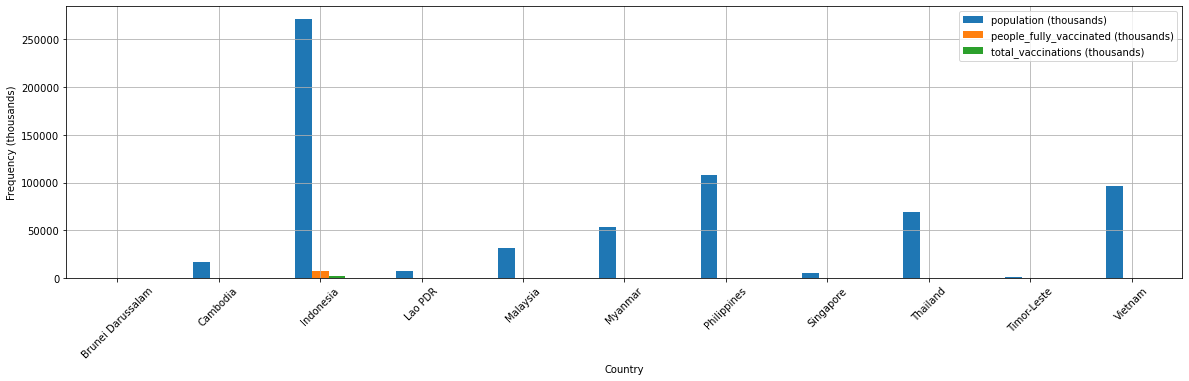

In [22]:
merged2 = merged.iloc[:,[0,1,3,4]]                          # Create another dataframe that holds the country, population, people_fully_vaccinated and daily_vaccinations
barplot = merged2.plot.bar(figsize=(20,5), grid=True)       # Construct bar chart of new dataframe
barplot.set_xticklabels(merged2['country'],rotation=45)     # label every tick on x-axis with the names of the respective countries and rotated 45°
plt.xlabel('Country')                                       # Label x-axis with 'Country'
plt.ylabel('Frequency (thousands)')                         # Label y-axis with 'Frequency (thousands)'
plt.show()                                                  # Display bar chart

#### The graph above is not easy to understand or to interpret as there are values that are too small of a value to fit in the graph. All  bars representing non 0 or non NaN values does exists in the graph but is very short that even zooming in or changing the figure size would not help with the visibility of the bars. 

#### This graph might display misleading information to viewers that there are no daily_vaccinations or people_fully_vaccinated for certain countries which is not true. 

#### As we do not have the complete data of people_fully_vaccinated and daily_vaccines for all countries, we can assume NaN values to be 0.

#### Below is the modified graph to imporve the visualisation of the bar chart.

## MODIFIED BAR CHART

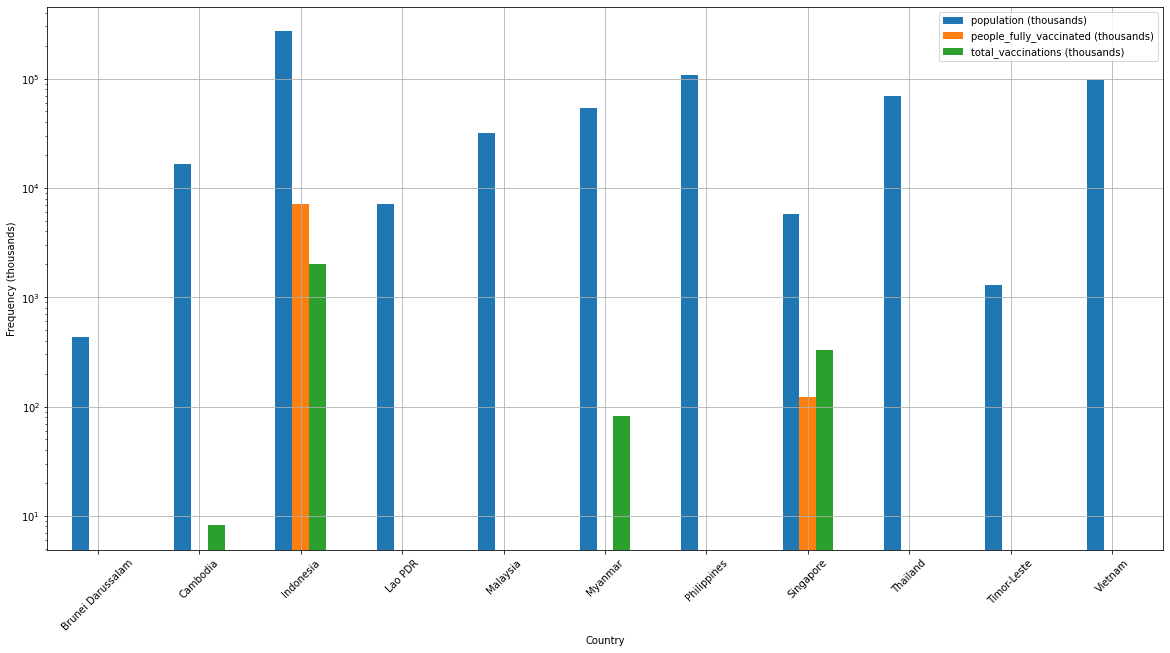

In [23]:
merged2 = merged.iloc[:,[0,1,3,4]]                      # Create a dataframe that holds the country, population, 
                                                        # people_fully_vaccinated and daily_vaccinations
    
barplot = merged2.plot.bar(figsize=(20,10), grid=True)  # Construct bar chart of new dataframe
barplot.set_xticklabels(merged2['country'],rotation=45) # label every tick on x-axis with the names of the respective countries and rotated 45°
plt.xlabel('Country')                                   # Label x-axis with 'Country'
plt.yscale('log')                                       # Change y-axis to logarithmic scale
plt.ylabel('Frequency (thousands)')                     # Label x-axis with 'Frequency (thousands)'
plt.show()                                              # Display bar chart

In [24]:
merged2 = merged.iloc[:,[0,1,3,4]] # Print dataframe with country, population (thousands), people_fully_vaccinated (thousands), daily_vaccinations (thousands)
merged2                            # Display dataframe

,country,population (thousands),people_fully_vaccinated (thousands),total_vaccinations (thousands)
0,Brunei Darussalam,433,NaN,NaN
1,Cambodia,16487,0.00,8.171
2,Indonesia,270626,7160.58,2022.788
3,Lao PDR,7169,NaN,NaN
4,Malaysia,31950,NaN,NaN
5,Myanmar,54045,0.00,82.823
6,Philippines,108117,NaN,NaN
7,Singapore,5804,122.10,329.630
8,Thailand,69626,NaN,NaN
9,Timor-Leste,1293,NaN,NaN


#### The dataframe is printed again for easy comparison with the bar chart
#### We can observe that the modified chart  was able to display the people_fully_vaccinated for Singapore and the daily_vaccinations for Cambodia, Indonesia, Myanmar and Singapore much clearly now.

#### The log scale applied to the y-axis is useful for a wide range of values in the data which will be difficult to plot. Using this scale, allows very small values and very large values to be clearly plotted on the same graph/chart for easy visualisation. 

#### Purely using this data is not appropriate either. This is because of the lack of data in the dataframe which can be used to determine trends and relationships between different columns. We should wait until sufficient data is retrieved for the people_fully_vaccinated and daily_vaccinations columns to be able to prove something.
#### This will also complete the bar chart and not make it look so empty as it is right now.

### 3. For the final question, you will probably need the non-aggregated data from “Vaccination.csv”. You are to extract the data that’s related only to Singapore and then plot a line graph on the daily_vaccinations over time. Like earlier, you are to discard the original total_vaccinations and create the total vaccinations for each day using the cumulative sum of the daily vaccinations (up to that day). Again, plot a line graph to visualise the cumulative vaccinations over time. Explain in what circumstances would the first line graph be useful (if at all) and in what circumstances that the second (cumulative) line graph would be useful?

In [25]:
singaporeVac = pd.read_csv('data/Vaccinations.csv')                    # Read original Vaccinations.csv file and store in variable 'singaporeVac'
singaporeVac = singaporeVac[singaporeVac.country == 'Singapore']       # Aggregate to obtain only rows belonging to Singapore
singaporeVac = singaporeVac[['country','date', 'daily_vaccinations']]  # Only retrieve columns of country, date and daily_vaccinations
singaporeVac.reset_index(drop=True,inplace=True)                       # Reset index of the new dataframe
singaporeVac                                                           # Display dataframe

,country,date,daily_vaccinations
0,Singapore,2021-01-11,NaN
1,Singapore,2021-01-12,2800.0
2,Singapore,2021-01-13,4090.0
3,Singapore,2021-01-14,4520.0
4,Singapore,2021-01-15,4735.0
5,Singapore,2021-01-16,4864.0
6,Singapore,2021-01-17,4950.0
7,Singapore,2021-01-18,5011.0
8,Singapore,2021-01-19,5380.0
9,Singapore,2021-01-20,5380.0


## FIRST LINE GRAPH

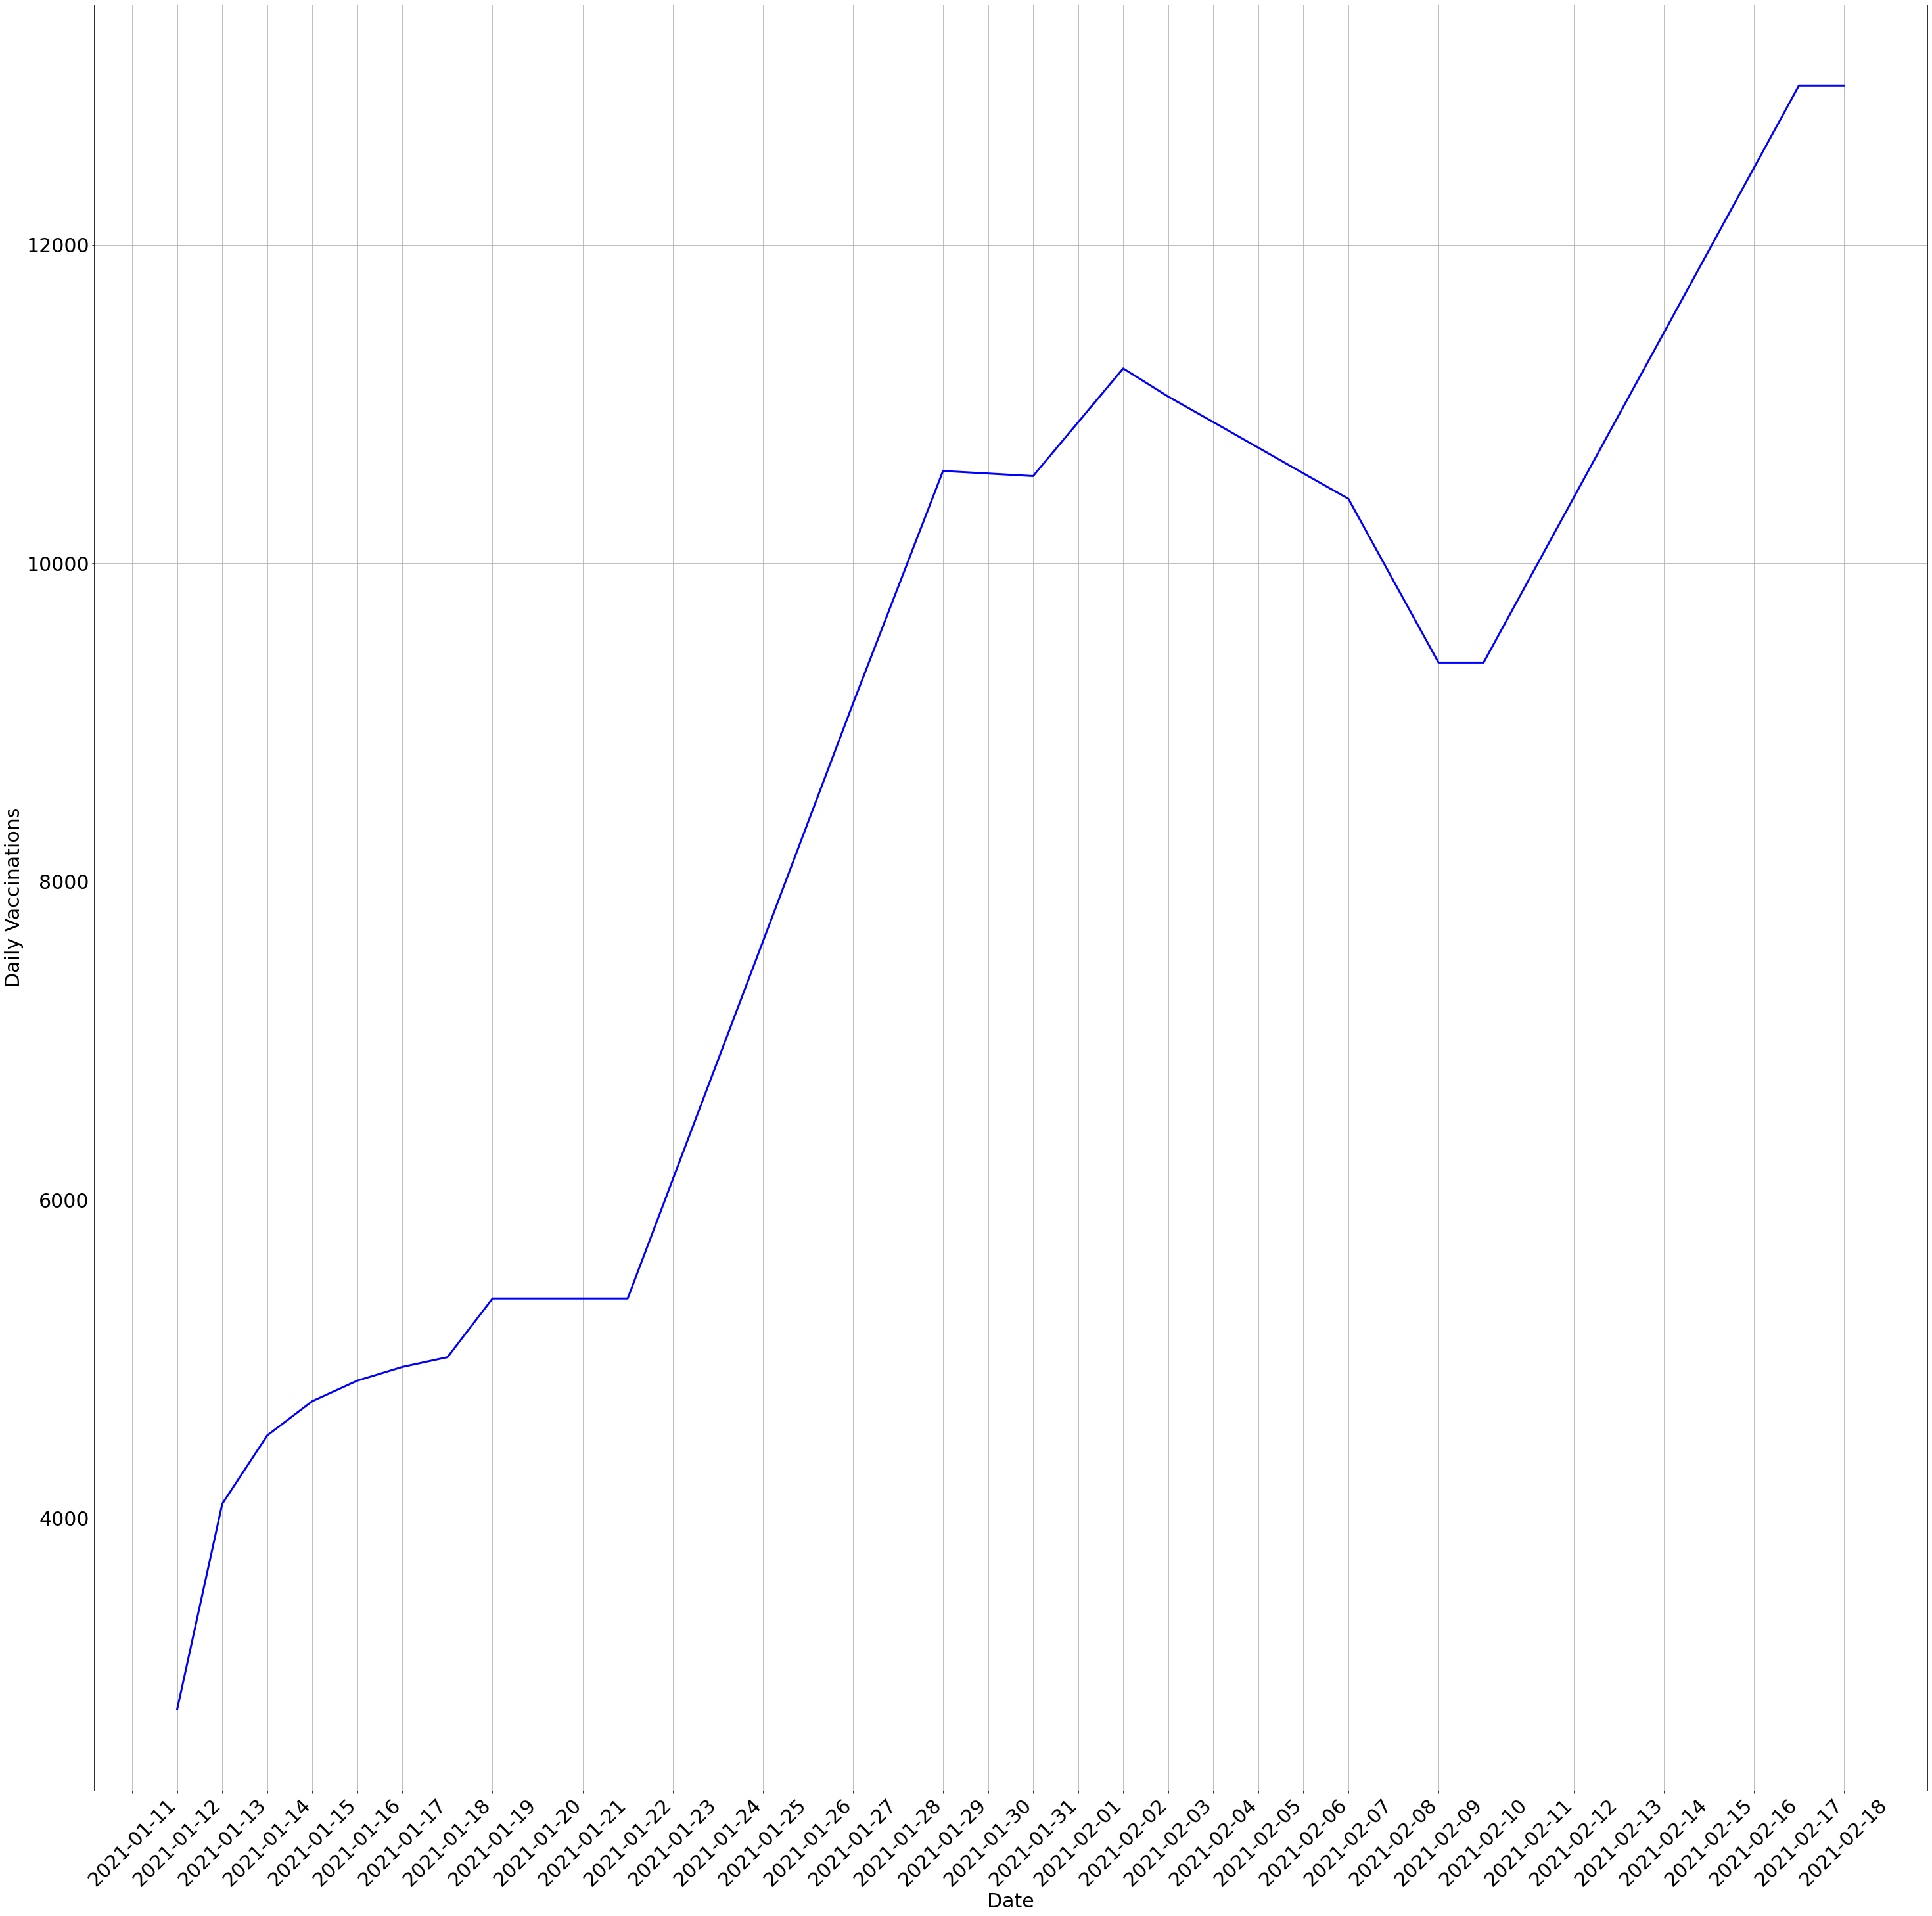

In [26]:
plt.figure(figsize=(50,50))                   # Configuring the size of the line graph
plt.plot('date', 'daily_vaccinations', data=singaporeVac, color='blue', linewidth=3) # Constructing the line graph of daily_vaccinations against date
plt.grid(True)                                # Apply a grid on the line graph
plt.xlabel('Date', fontsize=30)               # Label x-axis as 'Date'
plt.xticks(rotation=45, fontsize=30)          # Rotate ticks on x-axis by 45° and enlarge ticks font size
plt.ylabel('Daily Vaccinations', fontsize=30) # Label y-axis as 'Daily_Vaccinations'
plt.yticks(fontsize=30)                       # Enlarge ticks font size
plt.show()                                    # Display line graph

#### The first line graph tells us the pattern of how many vaccines are given daily to the citizens of SIngapore. This allows the officials to keep track of the consistency and efficiency in giving out vaccines every day. If the line starts to drop, the officials would know about this and try to increase their protocols or strategy in maintaining or improving vaccine distribution.
#### Once they see the line staying at a certain level, they can choose to increase that number or maintain the number of vaccinations given out daily.

In [27]:
singaporeVac['cumulative_daily_vaccinations'] = singaporeVac['daily_vaccinations'].cumsum(skipna=True) # Add a column to singaporeVac dataframe
                                                                                                       # that has contains the cumulative sum of daily_vaccinations

singaporeVac # Display dataframe 'singaporeVac'

,country,date,daily_vaccinations,cumulative_daily_vaccinations
0,Singapore,2021-01-11,NaN,NaN
1,Singapore,2021-01-12,2800.0,2800.0
2,Singapore,2021-01-13,4090.0,6890.0
3,Singapore,2021-01-14,4520.0,11410.0
4,Singapore,2021-01-15,4735.0,16145.0
5,Singapore,2021-01-16,4864.0,21009.0
6,Singapore,2021-01-17,4950.0,25959.0
7,Singapore,2021-01-18,5011.0,30970.0
8,Singapore,2021-01-19,5380.0,36350.0
9,Singapore,2021-01-20,5380.0,41730.0


## Second Line Graph

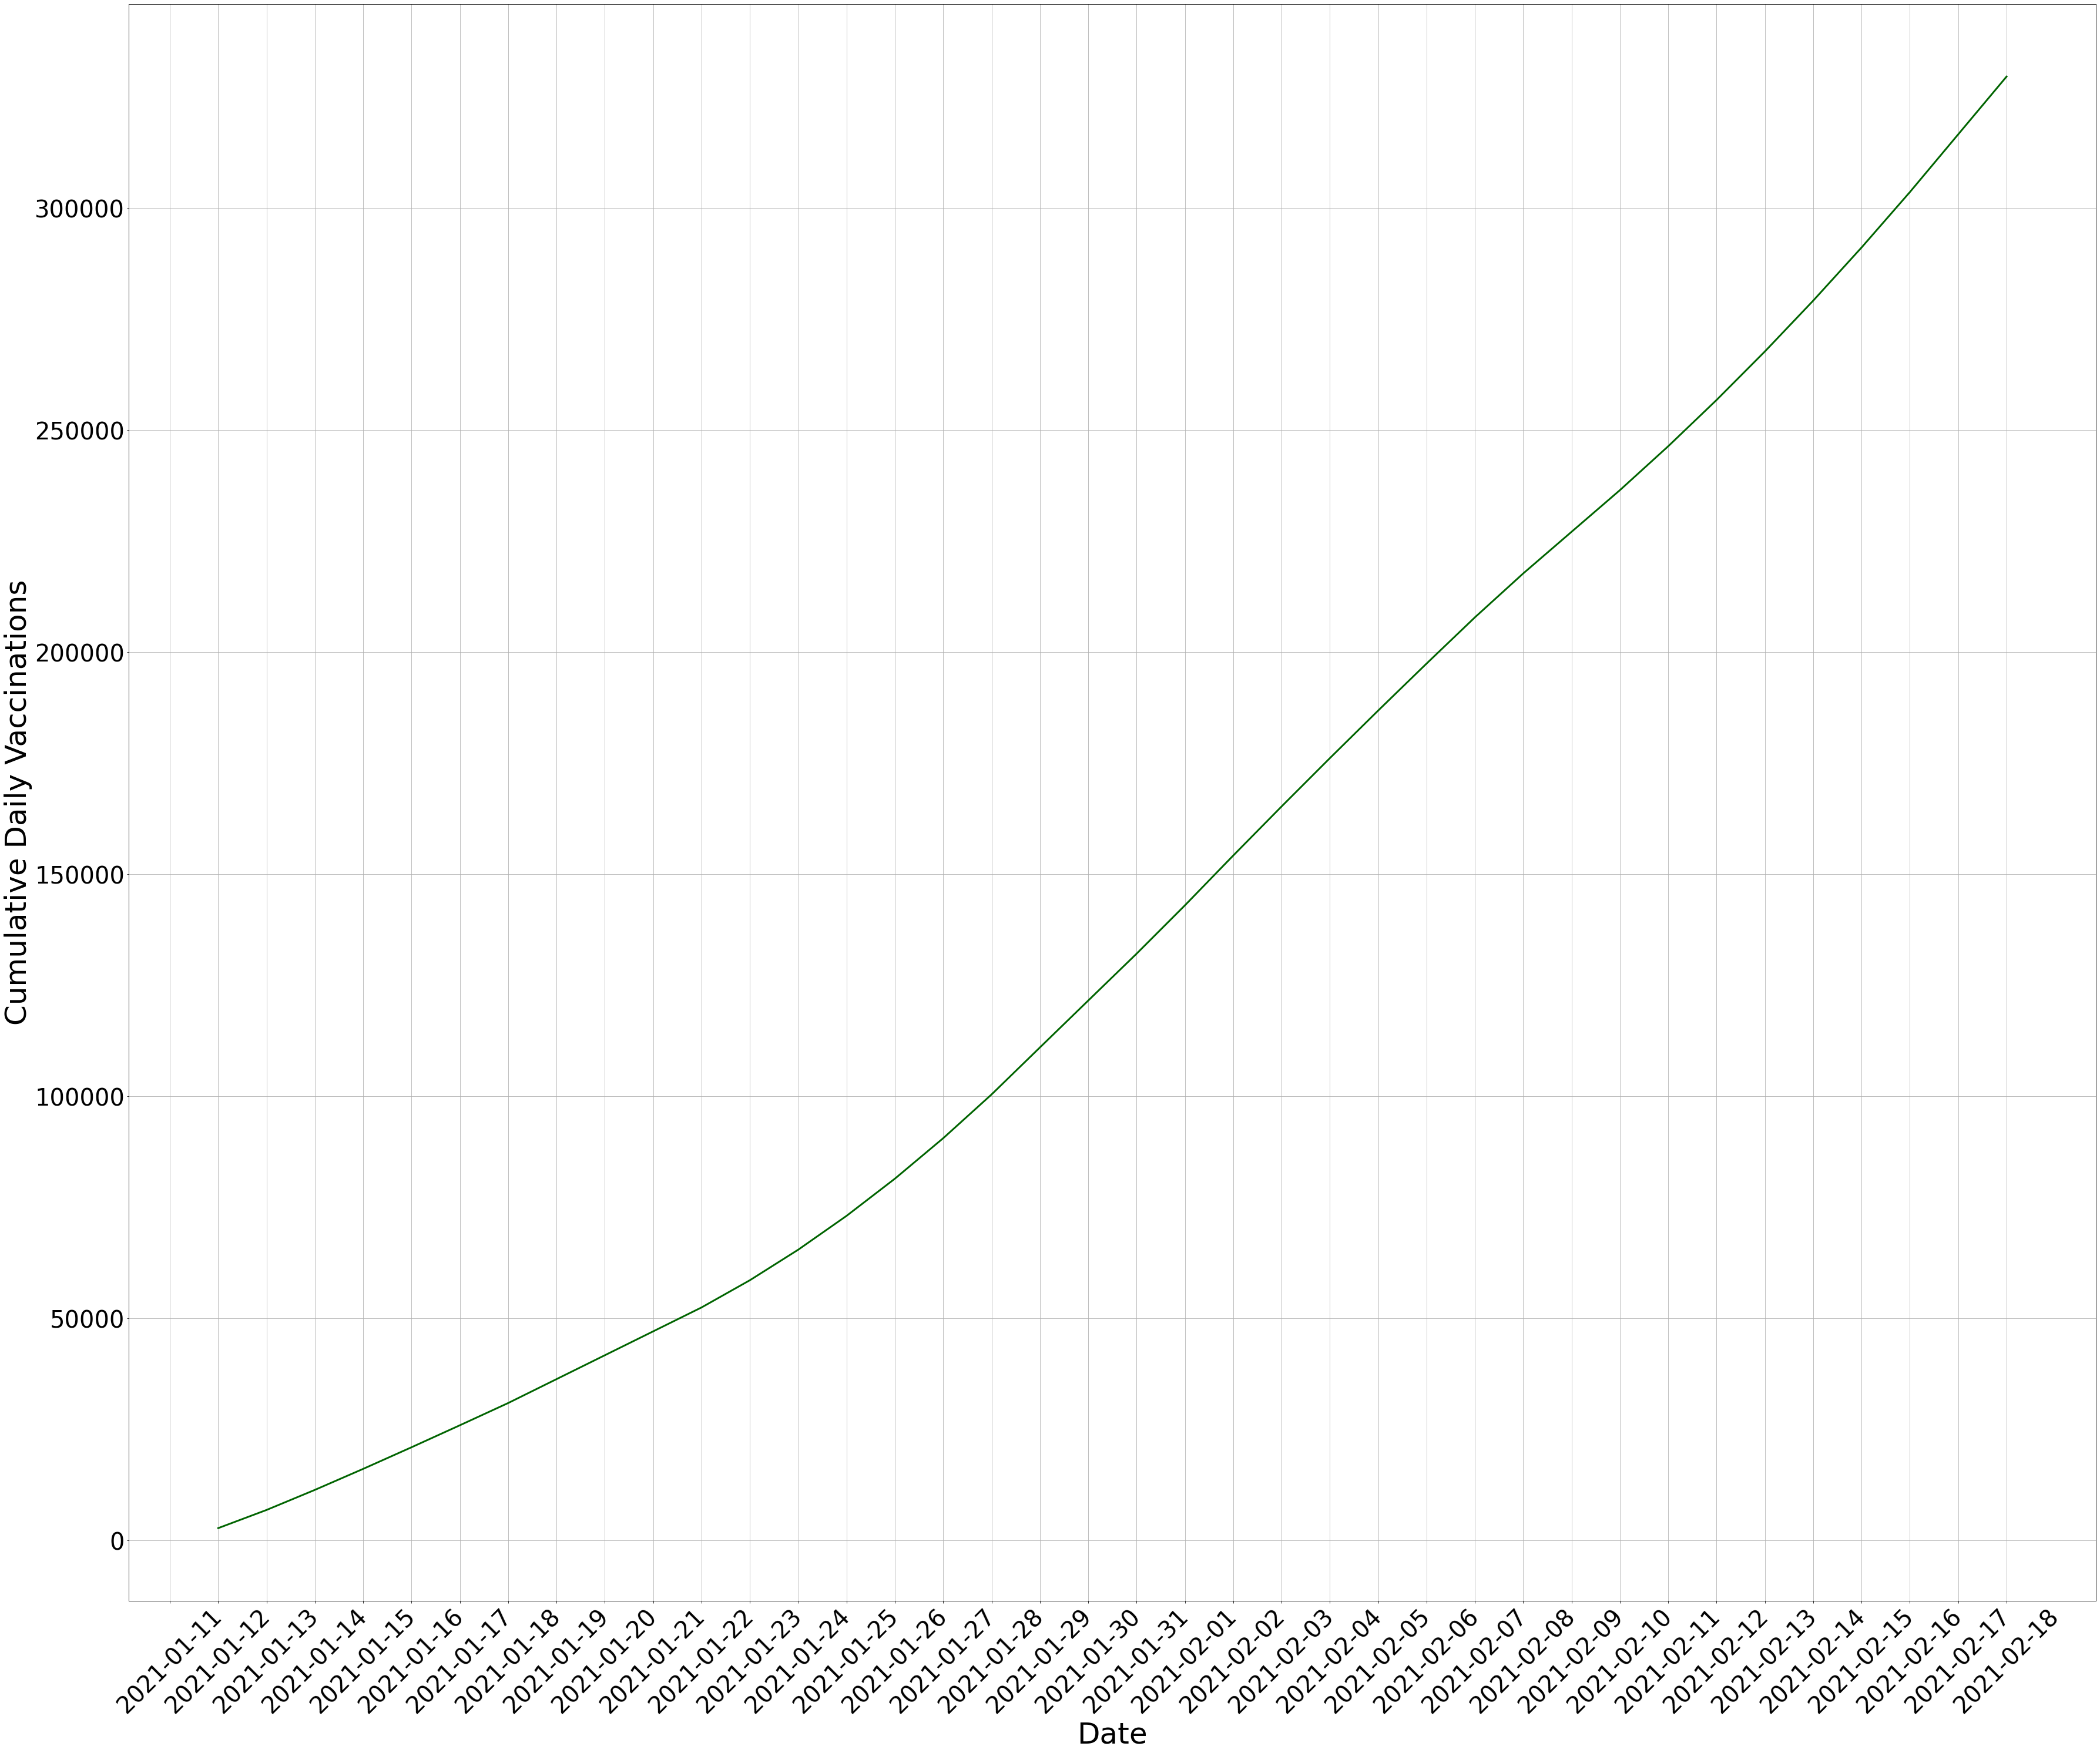

In [28]:
plt.figure(figsize=(60,50))                                # Configuring the size of the line graph
plt.plot('date', 'cumulative_daily_vaccinations', data=singaporeVac, color='darkgreen', linewidth=3) # Constructing the line graph of cumulative_daily_vaccinations against date
plt.grid(True)                                             # Apply a grid on the line graph
plt.xlabel('Date', fontsize=50)                            # Label x-axis as 'Date'
plt.xticks(rotation=45, fontsize=40)                       # Rotate ticks on x-axis by 45° and enlarge ticks font size
plt.ylabel('Cumulative Daily Vaccinations', fontsize=50)   # Label y-axis as 'Cumulative_Daily_Vaccinations'
plt.yticks(fontsize=40)                                    # Enlarge ticks font size
plt.show()                                                 # Display line graph                                                

#### The second line graph shows the total vaccinations of every day until a certain date. 
#### The steepness or the gradient of the line at a certain date can tell if there has been more or lesser vaccinations given in that day compared to the previous day.
#### The steeper the line is upwards, in other words, closer to the y-axis than the x-axis,  there has been an increase of vaccinations given compared to the previous day.
#### The officials are able to see the progress by seeing how steep the line is getting upwards or if it is staying at the same steepness.

# -----------------------------------END OF ANSWERS------------------------------------------------